In [1]:
%matplotlib inline

In [2]:
import os
import astropy.io.fits as py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['font.size'] = 25

In [4]:
import plotly.express as px
import pandas as pd

# Importing selected data

In [12]:
finelly_selected = ("WASP-19 b", "WASP-121 b", "WASP-4 b", "WASP-145 A b", "WASP-49 b", "WASP-6 b",
            "TOI-2842 b", "WASP-126 b", "WASP-174 b", "TOI-2421 b", "TOI-954 b", "WASP-147 b",
            "Wasp-20 b", "Wasp-131 b")

In [14]:
# Importing data from all papers from nasa
# Load the CSV file into a DataFrame
file_path = '../1-Population Observation/Catalog/PS_2023.09.21_07.43.54.csv'  # Replace with your actual file path
df = pd.read_csv(file_path, comment='#')
filtered_df = df[df['pl_name'].isin(finelly_selected)]
filtered_df.to_csv('Nasa_finally_selected_targets.csv', index=False)

/var/folders/rb/x7czqcn50038tc9lzxkw7z4h0000gn/T/ipykernel_17359/1086850706.py:4: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, comment='#')


# Checking the selected data in plots

In [15]:
# Load the CSV file into a DataFrame
file_path = '../1-Population Observation/Catalog/PSCompPars_2023.09.21_07.43.13.csv'  # Replace with your actual file path
df = pd.read_csv(file_path, comment='#')
filtered_df = df[df['pl_name'].isin(finelly_selected)]

In [16]:
# Constants
R_earth = 1.0  # Earth radius in Earth radii
T_earth = 288.0  # Earth's temperature in Kelvin
V_0 = 9  # Reference V-band magnitude

In [18]:
# Calculate TSM
filtered_df['TSM'] = (filtered_df['pl_rade'] / R_earth) ** 3 * (filtered_df['pl_eqt'] / T_earth) * 10 ** (-0.4 * (filtered_df['sy_vmag'] - V_0))
TSM = filtered_df['TSM']
# Apply log10 transformation to the 'TSM' column
filtered_df['log_TSM'] = np.log10(filtered_df['TSM'])

/var/folders/rb/x7czqcn50038tc9lzxkw7z4h0000gn/T/ipykernel_17359/1638037687.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['TSM'] = (filtered_df['pl_rade'] / R_earth) ** 3 * (filtered_df['pl_eqt'] / T_earth) * 10 ** (-0.4 * (filtered_df['sy_vmag'] - V_0))
/var/folders/rb/x7czqcn50038tc9lzxkw7z4h0000gn/T/ipykernel_17359/1638037687.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['log_TSM'] = np.log10(filtered_df['TSM'])


In [46]:
# Create the interactive plot
# Calculate the size array for the markers
default_size = 16  # Default size for null values
size_array = 17 - filtered_df['sy_vmag'].fillna(default_size)
# Convert all values below 1 to 1
size_array = np.where(size_array < 1, 1, size_array)

# Your scatter plot using log-transformed 'TSM' for coloring
#fig = px.scatter(df, x='pl_orbper', y='pl_bmassj', hover_data=['pl_name'])
fig = px.scatter(filtered_df, x='pl_orbper', y='pl_bmassj', color='log_TSM', hover_data=['pl_name'], size=size_array)
fig.update_xaxes(type='log', range=[np.log10(10**-1), np.log10(10**1.5)])  # Logarithmic range for x
fig.update_yaxes(type='log', range=[np.log10(10**-3), np.log10(10**1.5)])  # Logarithmic range for y


# Your lines data on linear scale
x = np.linspace(10**-1, 5, 100)  # Corresponding to original np.linspace(-1, np.log10(5))
x2 = np.linspace(10**-1, 10, 100)  # Corresponding to original np.linspace(-1, np.log10(10))
# Mazeh, T., Holczer, T., & Faigler, S. (2016). 
# Dearth of short-period Neptunian exoplanets - a desert in period-mass and period-radius planes. 
# Astronomy & Astrophysics, 589, A75. https://dx.doi.org/10.1051/0004-6361/201528065
# Calculate y-values based on x-values
y1 = x**(-1.14) * 10**0.23
y2 = x2**(-1.14) * 10**0.23
y3 = x**(0.98) * 10**(-1.85)
y4 = x2**(0.98) * 10**(-1.85)


# Add lines to the existing figure
import plotly.graph_objects as go
fig.add_trace(go.Scatter(x=x, y=y1, mode='lines', line=dict(color='black', dash='dash', width=3), showlegend=False))
fig.add_trace(go.Scatter(x=x2, y=y2, mode='lines', line=dict(color='black', dash='dash', width=1), showlegend=False))
fig.add_trace(go.Scatter(x=x, y=y3, mode='lines', line=dict(color='black', dash='dash', width=3), showlegend=False))
fig.add_trace(go.Scatter(x=x2, y=y4, mode='lines', line=dict(color='black', dash='dash', width=1), showlegend=False))


# Filter the DataFrame to include only the specified names
star_names = ['WASP-69 b', 'WASP-52 b', 'HAT-P-18 b', 'WASP-80 b', 'WASP-177 b', 'HAT-P-26 b', 'NGTS-5 b', 'LTT 9779 b']
star_df = df[df['pl_name'].isin(star_names)]

# Add a scatter trace with star markers for these points
fig.add_trace(go.Scatter(
    x=star_df['pl_orbper'],
    y=star_df['pl_bmassj'],
    mode='markers',
    marker=dict(
        symbol='star',  # Set marker shape as star
        size=13,        # Marker size
        color='green'     # Marker color
    ),
    customdata=np.stack((star_df['pl_name'], star_df['pl_bmassj'], star_df['pl_orbper']), axis=1),
    hovertemplate=
        "Star: %{customdata[0]}<br>" +
        "Mass: %{customdata[1]} Jupiter Masses<br>" +
        "Orbital Period: %{customdata[2]} days<br>" +
        "TSM: %{customdata[3]}",
    showlegend=False  # Remove this trace from the legend
))

# Adding black dots from the original 'df' data
fig.add_trace(
    go.Scatter(
        x=df['pl_orbper'], 
        y=df['pl_bmassj'], 
        mode='markers', 
        marker=dict(size=3,color='rgba(0, 0, 0, 0.5)'), 
        hovertemplate="Orbital Period: %{x}<br>Mass: %{y}",
        showlegend=False  # Optional: Remove this trace from the legend
    )
)



# Update layout for axis labels and title
fig.update_layout(
    xaxis_title='Orbital Period (days)',
    yaxis_title='Mass (Jupiter Masses)',
    title={
        'text': 'Orbital Period vs Mass of Exoplanets<br>Colored by log 10 TSM',
        'x': 0.5,  # Center the title
        'xanchor': 'center',
        'yanchor': 'top'
    },
    font=dict(
        size=14  # This will set the font size for both axis labels
    ),
    title_font=dict(
        size=16  # This sets the font size for the title
    ),
    width=1000,  # Width in pixels
    height=800   # Height in pixels
)

Static Plot

Text(0.5, 1.0, 'Orbital Period vs Mass')

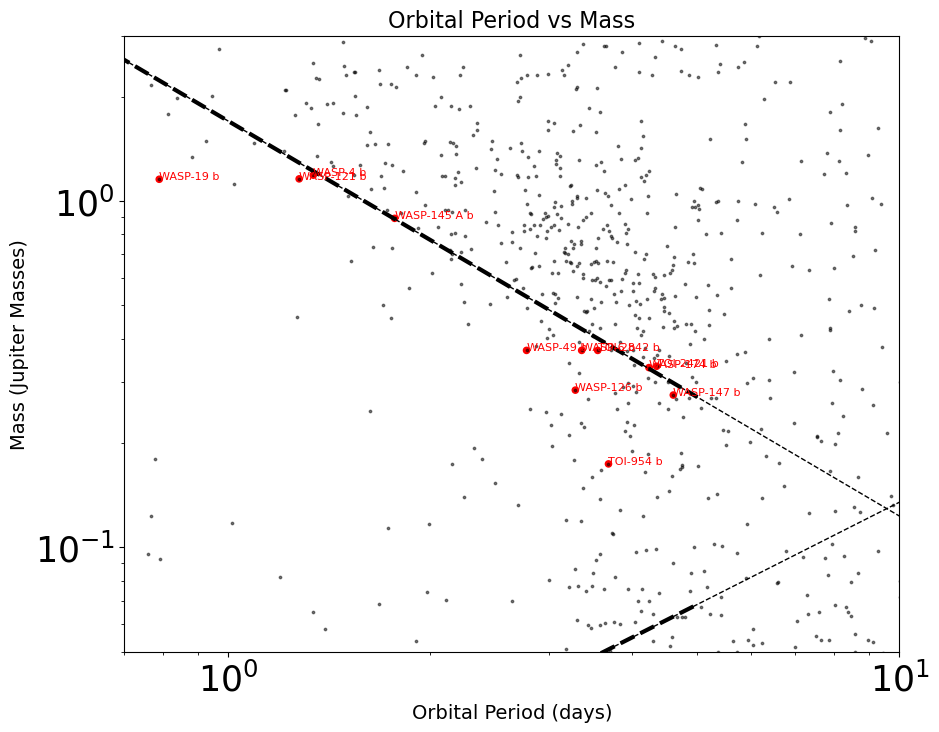

In [64]:
# Scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(filtered_df['pl_orbper'], filtered_df['pl_bmassj'], c='red', 
            s=np.ones_like(filtered_df['pl_orbper'])*20)
plt.xscale('log')
plt.yscale('log')

# Add text labels for the points in filtered_df
for i, row in filtered_df.iterrows():
    plt.text(row['pl_orbper'], row['pl_bmassj'], row['pl_name'], fontsize=8, color='red')

# Scatter plot for df without labels
plt.scatter(df['pl_orbper'], df['pl_bmassj'], c='black', s=3, alpha=0.5)

plt.xlim(0.7, 10)
plt.ylim(0.05, 3)

# Add lines to the plot
plt.plot(x, y1, 'k--', linewidth=3)
plt.plot(x2, y2, 'k--', linewidth=1)
plt.plot(x, y3, 'k--', linewidth=3)
plt.plot(x2, y4, 'k--', linewidth=1)

# Set axis labels and title
plt.xlabel('Orbital Period (days)', fontsize=14)
plt.ylabel('Mass (Jupiter Masses)', fontsize=14)
plt.title('Orbital Period vs Mass', fontsize=16)


In [66]:
from adjustText import adjust_text

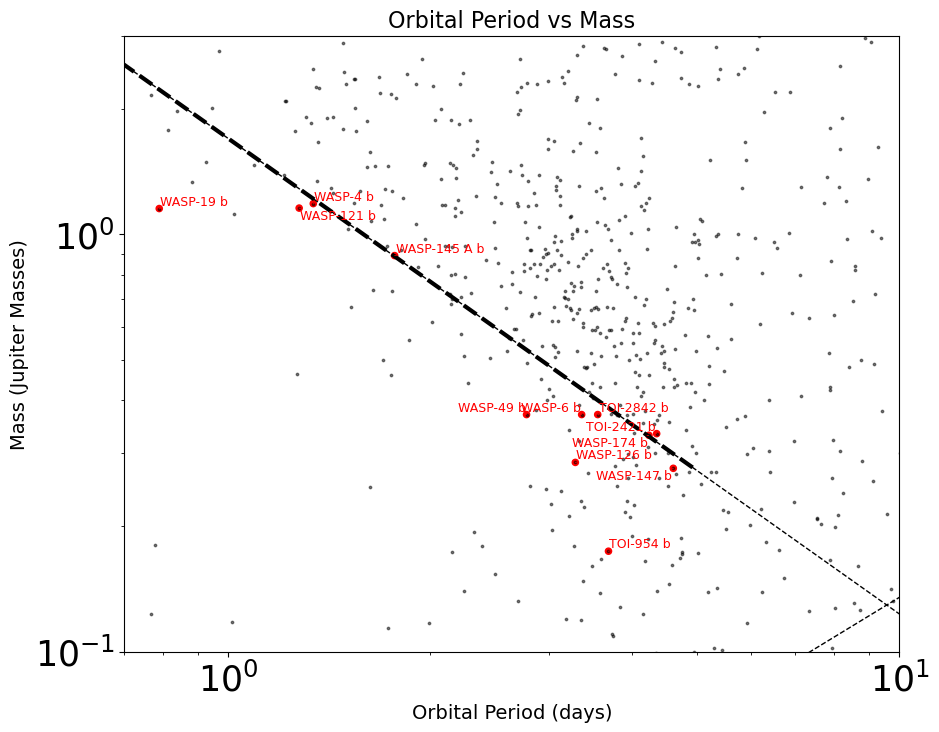

In [74]:
from adjustText import adjust_text

# Scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(filtered_df['pl_orbper'], filtered_df['pl_bmassj'], c='red', s=np.ones_like(filtered_df['pl_orbper'])*20)
plt.xscale('log')
plt.yscale('log')

# Prepare list to store text objects
texts = []
for i, row in filtered_df.iterrows():
    texts.append(plt.text(row['pl_orbper'], row['pl_bmassj'], row['pl_name'], fontsize=9, color='red'))

# Automatically adjust text to minimize overlaps
adjust_text(texts, arrowprops=dict(arrowstyle="-", color='red', lw=0.5))

# Scatter plot for df without labels
plt.scatter(df['pl_orbper'], df['pl_bmassj'], c='black', s=3, alpha=0.5)

# Add lines to the plot
plt.plot(x, y1, 'k--', linewidth=3)
plt.plot(x2, y2, 'k--', linewidth=1)
plt.plot(x, y3, 'k--', linewidth=3)
plt.plot(x2, y4, 'k--', linewidth=1)

# Set axis limits
plt.xlim(0.7, 10)
plt.ylim(0.1, 3)

# Set axis labels and title
plt.xlabel('Orbital Period (days)', fontsize=14)
plt.ylabel('Mass (Jupiter Masses)', fontsize=14)
plt.title('Orbital Period vs Mass', fontsize=16)

plt.show()


In [20]:
from astropy.modeling.models import BlackBody
from astropy import units as u
from scipy.integrate import quad
import numpy as np

def calculate_F_XUV_astropy(T, R):
    """
    Calculate the XUV flux \( F_{\text{XUV, star}} \) at the surface of the star using Astropy's BlackBody model.
    """
    bb = BlackBody(temperature=T * u.K)
    lambda_min = 1e-9  # 1 nm in meters
    lambda_max = 30e-9  # 30 nm in meters
    
    # Integrate the blackbody spectrum over the XUV range
    F_XUV_surface, _ = quad(lambda x: bb(x * u.m).to(u.W / (u.m**2 * u.m * u.sr), equivalencies=u.spectral_density(x * u.m)).value, lambda_min, lambda_max)
    
    # Convert to flux at a distance 'a' from the star
    F_XUV_star = F_XUV_surface * (R**2)  # No need to divide by a^2 here; that will be done in the next function
    
    return F_XUV_star * u.W / (u.m**2 * u.sr)

In [21]:
def calculate_F_XUV_planet(F_XUV_star, a, e):
    """
    Calculate the average incident XUV flux \( F_{\text{XUV, planet}} \) received by a planet.
    \( F_{\text{XUV, planet}} = \frac{F_{\text{XUV, star}}}{a^2 (1 - e^2)} \)
    """
    F_XUV_planet = F_XUV_star / (a**2 * (1 - e**2))
    return F_XUV_planet.to(u.W / (u.m**2 * u.sr))

# Example usage
T_eff = 5778  # Effective temperature of the Sun in Kelvin
R_star = 6.96e8 * u.m  # Radius of the Sun in meters
a = 1 * u.au  # Semi-major axis in astronomical units
e = 0.0167  # Eccentricity

F_XUV_star = calculate_F_XUV_astropy(T_eff, R_star)
F_XUV_planet = calculate_F_XUV_planet(F_XUV_star, a, e)

print(f"The XUV flux * R^2 emitted by the star is {F_XUV_star}")
print(f"The average incident F_XUV received by the planet is {F_XUV_planet}")

The XUV flux * R^2 emitted by the star is 7.971468937998598e-07 W / sr
The average incident F_XUV received by the planet is 3.562941332747358e-29 W / (m2 sr)


/Users/ricardoramirez/anaconda3/lib/python3.11/site-packages/astropy/units/quantity.py:611: RuntimeWarning:

overflow encountered in expm1



In [40]:
# it take 6 minutes and 25 s, it os for erg
def calculate_row_F_XUV(row):
    T = row['st_teff']  # Effective temperature in K
    R = row['st_rad']  # Radius in solar radii
    a = row['pl_orbsmax']  # Semi-major axis in AU
    e = row['pl_orbeccen']  # Eccentricity
    
    # Check for null values and return 0 if any parameter is null
    if np.isnan(e):
        e = 0
    if np.isnan(T) or np.isnan(R) or np.isnan(a):
        return 0
    
    R = R * 6.96e8 * u.m  # Convert radius from solar radii to meters
    a = a * u.au  # Convert semi-major axis from AU to meters
    
    F_XUV_star = calculate_F_XUV_astropy(T, R)
    F_XUV_planet = calculate_F_XUV_planet(F_XUV_star, a, e)
    
    # Convert to erg/s/cm^2/sr
    F_XUV_planet_erg = F_XUV_planet.to(u.erg / (u.cm**2 * u.s * u.sr))
    
    return F_XUV_planet_erg.value  # Return the numerical value in erg


# Add a new column 'F_XUV' to the DataFrame
filtered_df['F_XUV'] = filtered_df.apply(calculate_row_F_XUV, axis=1)
df['F_XUV'] = df.apply(calculate_row_F_XUV, axis=1)

# Now filtered_df has a new column 'F_XUV' containing the calculated values or 0 where parameters are null

/Users/ricardoramirez/anaconda3/lib/python3.11/site-packages/astropy/units/quantity.py:611: RuntimeWarning:

overflow encountered in expm1

/Users/ricardoramirez/anaconda3/lib/python3.11/site-packages/astropy/units/quantity.py:611: RuntimeWarning:

overflow encountered in multiply

/var/folders/rb/x7czqcn50038tc9lzxkw7z4h0000gn/T/ipykernel_17359/3261271176.py:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/ricardoramirez/anaconda3/lib/python3.11/site-packages/astropy/units/quantity.py:611: RuntimeWarning:

overflow encountered in expm1

/Users/ricardoramirez/anaconda3/lib/python3.11/site-packages/astropy/units/quantity.py:611: RuntimeWarning:

overflow encountered in multiply



In [39]:
# Create the interactive plot
filtered_df['log10_F_XUV'] = np.log10(filtered_df['F_XUV'])
# Your scatter plot using log-transformed 
fig = px.scatter(filtered_df, x='pl_orbsmax', y='pl_bmassj', color='log10_F_XUV', 
                 hover_data=['pl_name'], size=size_array, range_color=[-40, -10])
fig.update_xaxes(type='log', range=[np.log10(10**-2), np.log10(10**-1)])  # Logarithmic range for x
fig.update_yaxes(type='log', range=[np.log10(0.05), np.log10(2)])  # Logarithmic range for y



# Filter the DataFrame to include only the specified names
star_names = ['WASP-69 b', 'WASP-52 b', 'HAT-P-18 b', 'WASP-80 b', 'WASP-177 b', 'HAT-P-26 b', 'NGTS-5 b', 'LTT 9779 b']
star_df = df[df['pl_name'].isin(star_names)]

# Add a scatter trace with star markers for these points
fig.add_trace(go.Scatter(
    x=star_df['pl_orbsmax'],
    y=star_df['pl_bmassj'],
    mode='markers',
    marker=dict(
        symbol='star',  # Set marker shape as star
        size=12,        # Marker size
        color='red'     # Marker color
    ),
    customdata=np.stack((star_df['pl_name'], star_df['pl_bmassj'], star_df['pl_orbsmax']), axis=1),
    hovertemplate=
        "Star: %{customdata[0]}<br>" +
        "Mass: %{customdata[1]} Jupiter Masses<br>" +
        "semimayor axis: %{customdata[2]} au<br>" +
        "log10_F_XUV: %{customdata[3]}",
    showlegend=False  # Remove this trace from the legend
))

# Adding black dots from the original 'df' data
fig.add_trace(
    go.Scatter(
        x=df['pl_orbsmax'], 
        y=df['pl_bmassj'], 
        mode='markers', 
        marker=dict(size=3,color='rgba(0, 0, 0, 0.5)'), 
        hovertemplate="Orbital Period: %{x}<br>Mass: %{y}",
        showlegend=False  # Optional: Remove this trace from the legend
    )
)


fig.update_layout(
    xaxis_title='Semimajor axis [au]',
    yaxis_title='Mass (Jupiter Masses)',
    title={
        'text': 'Orbital Period vs Mass of Exoplanets<br>Colored by log10 F XUV',
        'x': 0.5,  # Center the title
        'xanchor': 'center',
        'yanchor': 'top'
    },
    font=dict(
        size=14  # This will set the font size for both axis labels
    ),
    title_font=dict(
        size=16  # This sets the font size for the title
    ),
    width=1000,  # Width in pixels
    height=600,  # Height in pixels
    shapes=[
        # Add a rectangle shape to fill the plot from 0.2 Jupiter mass to the bottom
        dict(
            type='rect',
            xref='x domain',  # x-reference is set to the x-axis domain
            yref='y',  # y-reference is set to the y-axis values
            x0=0,  # x0 and x1 define the x-axis range of the rectangle
            x1=1,
            y0=0,  # y0 and y1 define the y-axis range of the rectangle
            y1=0.2,  # Convert 0.2 Jupiter mass to its logarithmic scale
            fillcolor='black',  # Fill color
            opacity=0.1,  # Opacity (0 is fully transparent, 1 is fully opaque)
            line=dict(
                width=0  # No border line
            )
        ),
        
       # Add the first orange line 
        dict(
            type='line',
            xref='x',
            yref='y',
            x0=0.01,
            y0=2.2,  # Convert to logarithmic scale
            x1=0.034,
            y1=0.31,  # Convert to logarithmic scale
            line=dict(
                color='orange',
                width=2
            )
        ),
        # Add line
        dict(
            type='line',
            xref='x',
            yref='y',
            x0=0.034,
            y0=0.31,  # Convert to logarithmic scale
            x1=0.1,
            y1=0.11,  # Convert to logarithmic scale
            line=dict(
                color='orange',
                width=2
            )
        ),
        # Add the first red line 
        dict(
            type='line',
            xref='x',
            yref='y',
            x0=0.01,
            y0=0.6,  # Convert to logarithmic scale
            x1=0.034,
            y1=0.09,  # Convert to logarithmic scale
            line=dict(
                color='red',
                width=2
            )
        ),
        # Add line
        dict(
            type='line',
            xref='x',
            yref='y',
            x0=0.034,
            y0=0.09,  # Convert to logarithmic scale
            x1=0.1,
            y1=0.03,  # Convert to logarithmic scale
            line=dict(
                color='red',
                width=2
            )
        )
    ]
)

/var/folders/rb/x7czqcn50038tc9lzxkw7z4h0000gn/T/ipykernel_17359/1495706158.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [42]:
# Calculate the size array for the markers
default_size = 1  # Default size for null values
size_array = filtered_df['pl_rade'].fillna(default_size)

# Create the interactive plot
# Your scatter plot using log-transformed 'TSM' for coloring
fig = px.scatter(filtered_df, x='F_XUV', y='pl_bmassj', color='pl_eqt', 
                 hover_data=['pl_name'], size=size_array, range_color=[500, 2500])
fig.update_xaxes(type='log', range=[-6,-50])  # Logarithmic range for x
fig.update_yaxes(type='log', range=[np.log10(0.005), np.log10(10**1.5)])  # Logarithmic range for y


# Filter the DataFrame to include only the specified names
star_names = ['WASP-69 b', 'WASP-52 b', 'HAT-P-18 b', 'WASP-80 b', 'WASP-177 b', 'HAT-P-26 b', 'NGTS-5 b', 'LTT 9779 b']
star_df = df[df['pl_name'].isin(star_names)]

# Add a scatter trace with star markers for these points
fig.add_trace(go.Scatter(
    x=star_df['F_XUV'],
    y=star_df['pl_bmassj'],
    mode='markers',
    marker=dict(
        symbol='star',  # Set marker shape as star
        size=12,        # Marker size
        color='red'     # Marker color
    ),
    customdata=np.stack((star_df['pl_name'], star_df['pl_bmassj'], star_df['pl_eqt']), axis=1),
    hovertemplate=
        "Star: %{customdata[0]}<br>" +
        "Mass: %{customdata[1]} Jupiter Masses<br>" +
        "semimayor axis: %{customdata[2]} au<br>" +
        "log10_F_XUV: %{customdata[3]}",
    showlegend=False  # Remove this trace from the legend
))

# Adding black dots from the original 'df' data
fig.add_trace(
    go.Scatter(
        x=df['F_XUV'], 
        y=df['pl_bmassj'], 
        mode='markers', 
        marker=dict(size=3,color='rgba(0, 0, 0, 0.5)'), 
        hovertemplate="Orbital Period: %{x}<br>Mass: %{y}",
        showlegend=False  # Optional: Remove this trace from the legend
    )
)


# Update layout for axis labels and title
fig.update_layout(
    xaxis_title=r'$F_{XUV} (erg / cm^2 s sr)$',
    yaxis_title='Mass (Jupiter Masses)',
    title={
        'text': 'F XUV vs Mass of Exoplanets<br>Colored by T equil',
        'x': 0.5,  # Center the title
        'xanchor': 'center',
        'yanchor': 'top'
    },
    font=dict(
        size=14  # This will set the font size for both axis labels
    ),
    title_font=dict(
        size=16  # This sets the font size for the title
    ),
    width=1000,  # Width in pixels
    height=800,   # Height in pixels
    shapes=[
        # Add a rectangle shape to fill the plot from 0.2 Jupiter mass to the bottom
        dict(
            type='line',
            xref='x',
            yref='y',
            x0=10e-7,
            y0=6,  # Convert to logarithmic scale
            x1=50e-21,
            y1=0.3,  # Convert to logarithmic scale
            line=dict(
                color='red',
                width=2
            )
        ),
        dict(
            type='line',
            xref='x',
            yref='y',
            x0=50e-21,
            y0=0.3,  # Convert to logarithmic scale
            x1=50e-21,
            y1=0.001,  # Convert to logarithmic scale
            line=dict(
                color='red',
                width=2
            )
        )
    ]
)

